## Model Training
#### 1. Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\mobin\DATASIENCE\INEURONE PROJECTS\mlprojects\notebook\stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# preparing x and y variables

X = df.drop('math_score', axis = 1)
Y = df['math_score']

In [5]:
X

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [6]:
Y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [23]:
print(f"Categories in 'gender' are {len(df['gender'].unique())} variable: ", df['gender'].unique() )
print(f"\nCategories in 'race_ethnicity' are {len(df['race_ethnicity'].unique())} variable:  ",df['race_ethnicity'].unique())
print("\nCategories in'parental level of education' variable:",len(df['parental_level_of_education'].unique()),df['parental_level_of_education'].unique())
print("\nCategories in 'lunch' variable:   ",len(df['lunch'].unique()),df['lunch'].unique())
print("\nCategories in 'test preparation course' variable:  ",len(df['test_preparation_course'].unique()),df['test_preparation_course'].unique())

Categories in 'gender' are 2 variable:  ['female' 'male']

Categories in 'race_ethnicity' are 5 variable:   ['group B' 'group C' 'group A' 'group D' 'group E']

Categories in'parental level of education' variable: 6 ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Categories in 'lunch' variable:    2 ['standard' 'free/reduced']

Categories in 'test preparation course' variable:   2 ['none' 'completed']


In [27]:
numerical_features = [feature for feature in X.columns if X[feature].dtype != 'O']
categorical_features = [feature for feature in X.columns if X[feature].dtype == "O"]

In [28]:
numerical_features

['reading_score', 'writing_score']

In [29]:
categorical_features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [30]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


num_transformer = StandardScaler()
cat_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", cat_transformer,categorical_features),
        ("StandardScaler", num_transformer, numerical_features)
    ]
)

In [31]:
X = preprocessor.fit_transform(X)

In [32]:
X.shape

(1000, 19)

#### Sperate Data set into Train and Test

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

## Create an Evaluate Function to give all metrics after model Training

In [39]:
# Modeling...

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [40]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

In [46]:
list(models.values())[0]

LinearRegression()

In [50]:
for i in range(len(models)):
    print(i)

0
1
2
3
4
5
6
7
8


In [55]:
list(models.keys())[0]

'Linear Regression'

In [42]:
def evaluate_reg(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [64]:
def evaluate_models(X_train, X_test, y_train, y_test, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    models_list =[]
    r2_list = []

    for i in range(0 , len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Training the Model

        # make prediction
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # evaluate train and test dataset

        model_train_mae, model_train_rmse, model_train_r2 = evaluate_reg(y_train,y_train_pred)
        model_test_mae, model_test_rmse, model_test_r2 = evaluate_reg(y_test,y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
        print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
        print("- R2 Score: {:.4f}".format(model_train_r2))

        print('----------------------------------')

        print('Model performance for Test set')
        print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
        print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
        print("- R2 Score: {:.4f}".format(model_test_r2))
        r2_list.append(model_test_r2)
        print('='*35)
        print('\n')

        report = pd.DataFrame(list(zip(models_list, r2_list)), columns = ['Model Name', 'r2_score']).sort_values(by='r2_score')
    
    return report

In [65]:
base_report = evaluate_models(X_train, X_test, y_train, y_test, models)

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7092
- Mean Absolute Error: 4.5180
- R2 Score: 0.8554
-----------------------

In [66]:
base_report

,Model Name,r2_score
4,Decision Tree,0.742416
3,K-Neighbors Regressor,0.783898
1,Lasso,0.825320
6,XGBRegressor,0.827797
8,AdaBoost Regressor,0.843103
5,Random Forest Regressor,0.851533
7,CatBoosting Regressor,0.851632
0,Linear Regression,0.880433
2,Ridge,0.880593


## Linear Regression

In [67]:
lin_model = LinearRegression()
lin_model.fit(X_train,y_train)

LinearRegression()

In [68]:
y_pred = lin_model.predict(X_test)

In [70]:
score = r2_score(y_test, y_pred)*100
score

88.04332983749565

Text(0, 0.5, 'Predicted')

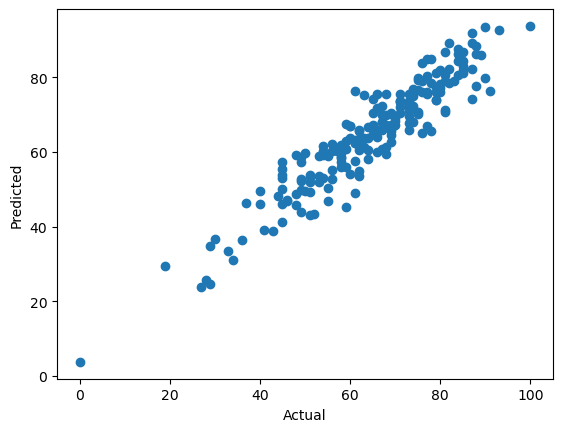

In [71]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel('Predicted')

In [72]:
import seaborn as sns

<Axes: xlabel='math_score'>

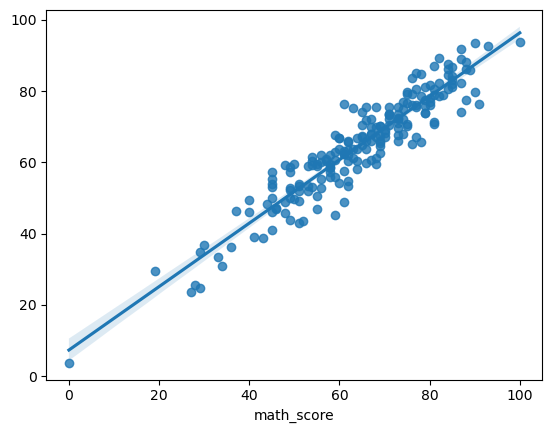

In [73]:
sns.regplot(x=y_test, y=y_pred)